In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ds = pd.read_csv('lorawan_dataset_antwerp.csv')

In [19]:
ds.duplicated().sum()

0

Text(0, 0.5, 'Sample Number')

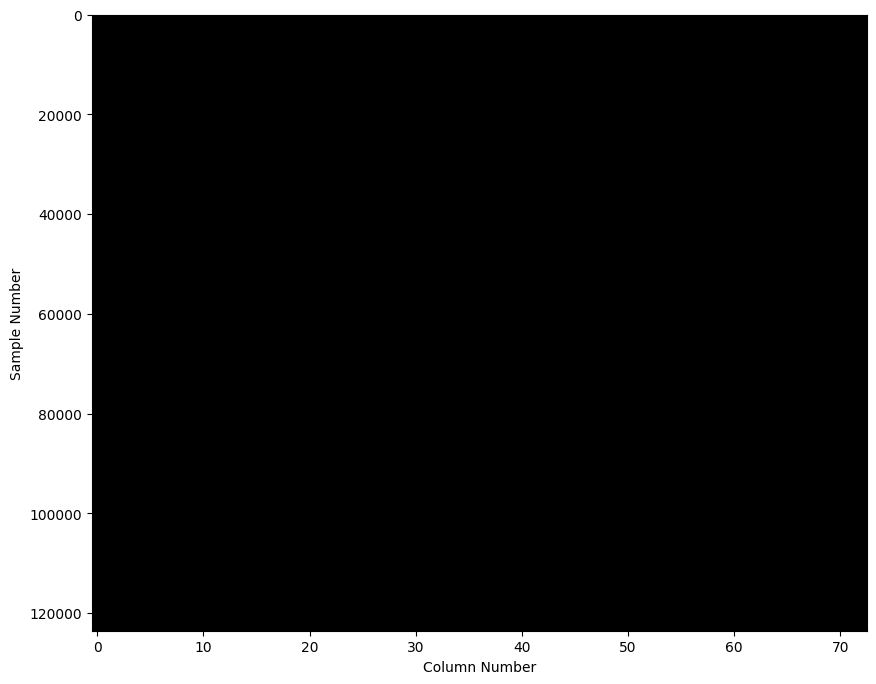

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(ds.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

<Axes: >

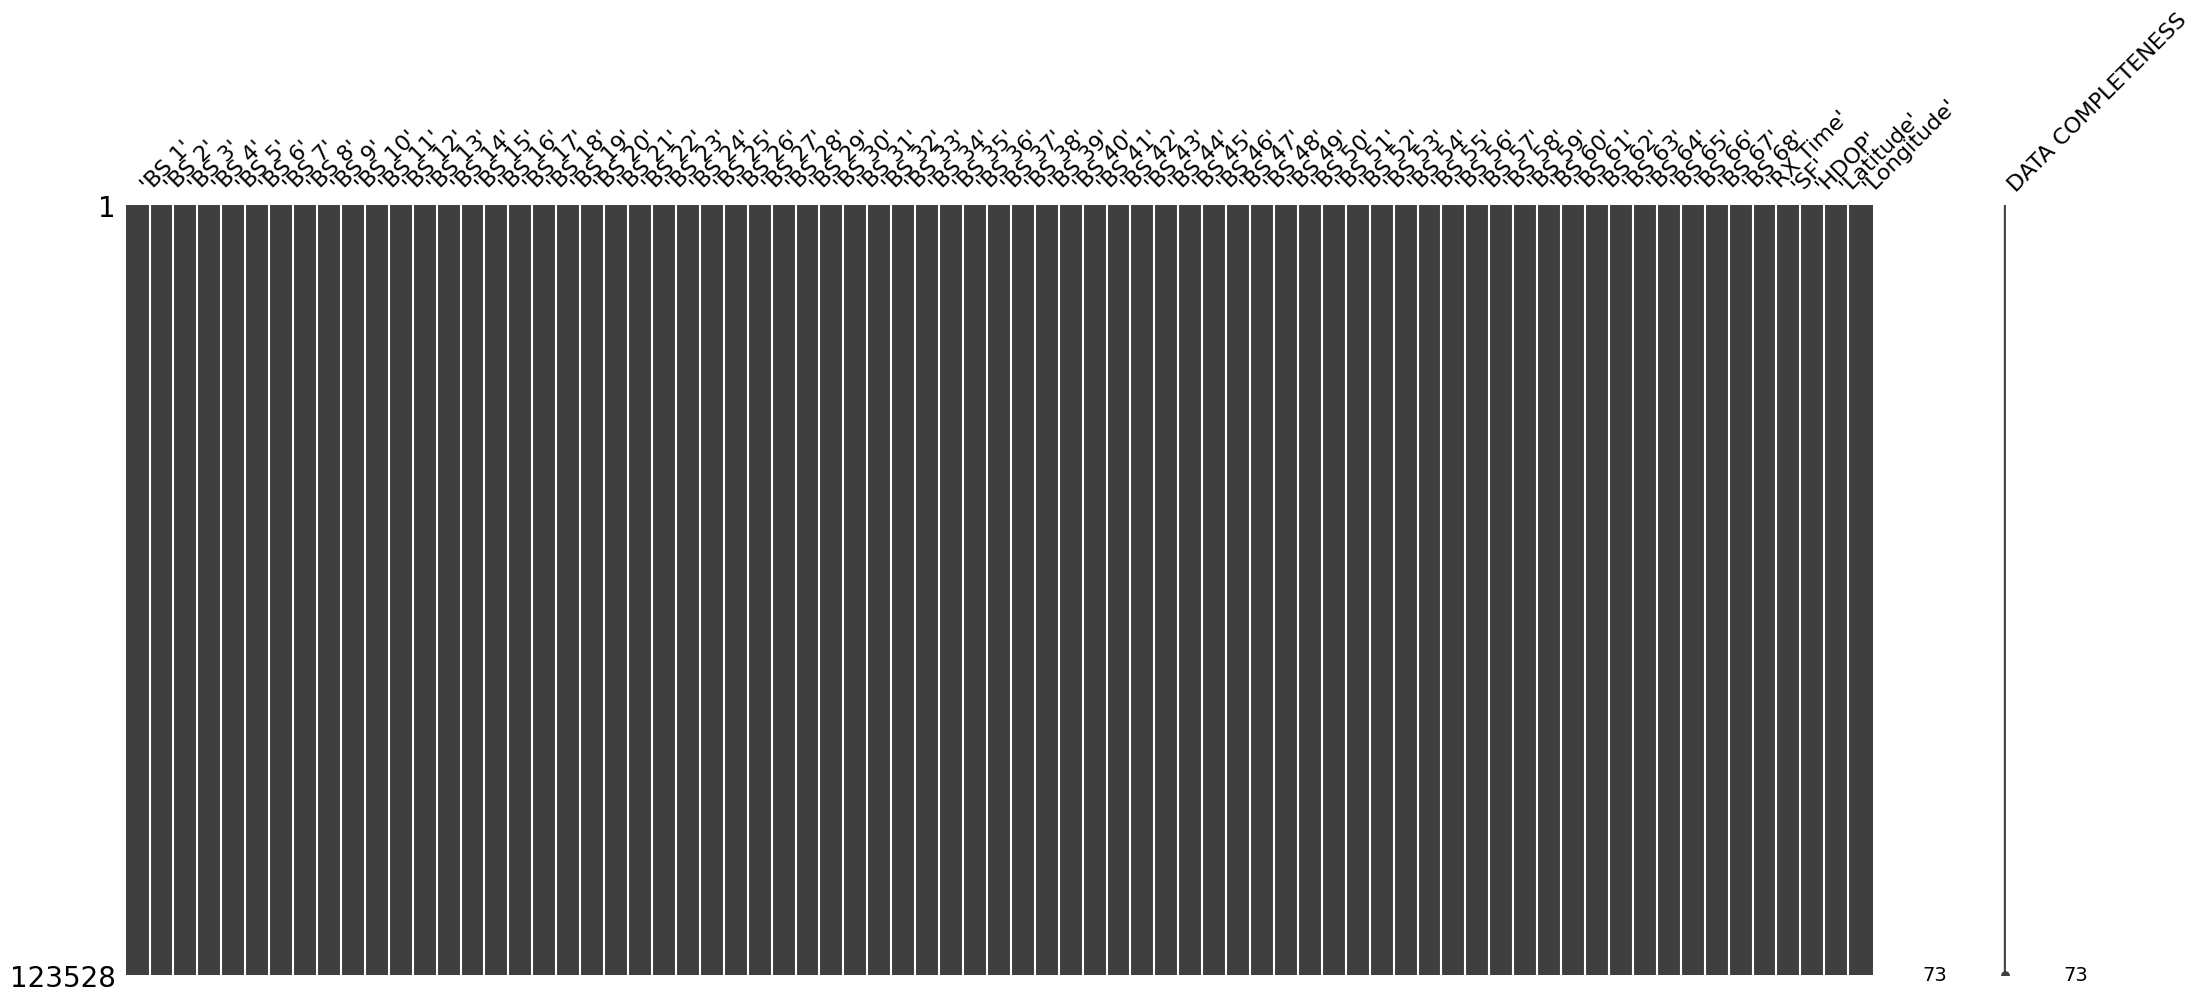

In [21]:
# Plotting Missing vlues 
import missingno as msno

msno.matrix(ds, labels=True, sort="descending")

<Axes: title={'center': 'Percentage of missing values per feature'}, ylabel='Ratio of missing values per feature'>

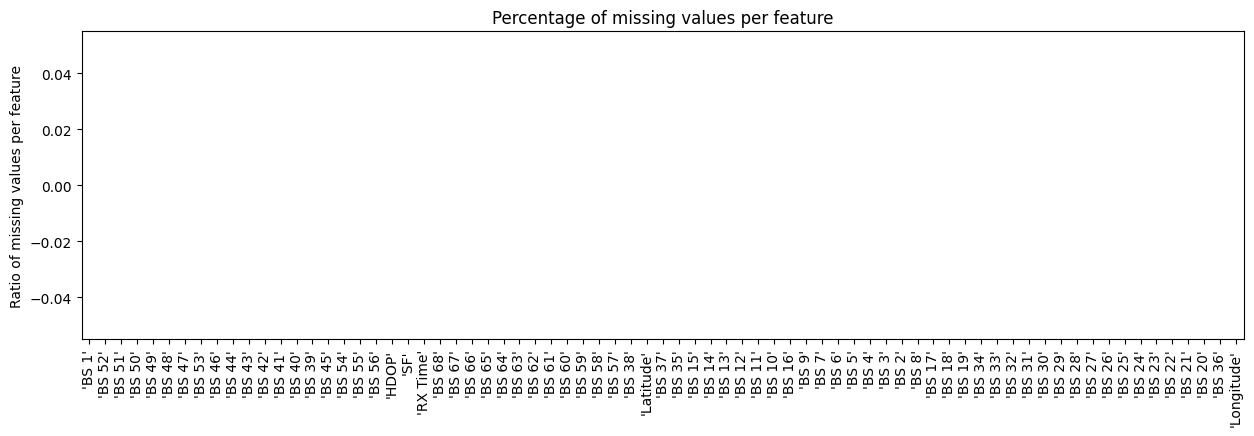

In [22]:
ds.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature")

In [23]:
print(f'Samples with ideal HDOP vlaue {ds.loc[ds['\'HDOP\'']<1].shape[0]}  ({ds.loc[ds['\'HDOP\'']<1].shape[0]/ds.shape[0]*100} %)')
print(f'Samples with excellent HDOP vlaue {ds.loc[(ds['\'HDOP\''] > 1) & (ds['\'HDOP\''] < 2)].shape[0]} ({ds.loc[(ds['\'HDOP\''] > 1) & (ds['\'HDOP\''] < 2)].shape[0]/ds.shape[0]*100} %)')
print(f'Samples with good HDOP vlaue {ds.loc[(ds['\'HDOP\''] > 2) & (ds['\'HDOP\''] < 5)].shape[0]} ({ds.loc[(ds['\'HDOP\''] > 2) & (ds['\'HDOP\''] < 5)].shape[0]/ds.shape[0]*100}%)')
print(f'Samples with moderate HDOP vlaue {ds.loc[(ds['\'HDOP\''] > 5) & (ds['\'HDOP\''] < 10)].shape[0]} ({ds.loc[(ds['\'HDOP\''] > 5) & (ds['\'HDOP\''] < 10)].shape[0]/ds.shape[0]*100} %)')
print(f'Samples with fair HDOP vlaue {ds.loc[(ds['\'HDOP\''] > 10) & (ds['\'HDOP\''] < 20)].shape[0]} {ds.loc[(ds['\'HDOP\''] > 10) & (ds['\'HDOP\''] < 20)].shape[0]}')
print(f'Samples with poor HDOP vlaue {ds.loc[ds['\'HDOP\'']>20].shape[0]} ({ds.loc[ds['\'HDOP\'']>20].shape[0]/ds.shape[0]*100} %)')

Samples with ideal HDOP vlaue 110239  (89.24211514798264 %)
Samples with excellent HDOP vlaue 11817 (9.566252185739266 %)
Samples with good HDOP vlaue 780 (0.6314357878375753%)
Samples with moderate HDOP vlaue 74 (0.05990544653843662 %)
Samples with fair HDOP vlaue 10 10
Samples with poor HDOP vlaue 12 (0.009714396735962697 %)


In [24]:
ds_mod = ds.copy()
ds_mod.columns = ds_mod.columns.str.replace("'", "")

ds_mod["RX Time"] = pd.to_datetime(ds_mod['RX Time'])

C:\Users\Sudip Barua\AppData\Local\Temp\ipykernel_3232\753639406.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ds_mod["RX Time"] = pd.to_datetime(ds_mod['RX Time'])


In [25]:
ds_mod

BS 1  BS 2  BS 3  BS 4  BS 5  BS 6  BS 7  BS 8  BS 9  BS 10  ...  \
0       -200  -200  -200  -200  -200  -200  -200  -200  -114   -200  ...   
1       -200  -200  -200  -200  -200  -200  -200  -200  -200   -200  ...   
2       -200  -200  -200  -200  -200  -200  -200  -200  -200   -200  ...   
3       -200  -100  -200  -200  -200  -200  -200  -200  -200   -113  ...   
4       -200  -106  -107  -200  -200  -200  -200  -200  -200   -200  ...   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
123523  -200  -103  -106  -200  -200  -200  -200  -200  -200   -200  ...   
123524  -200  -200  -200  -200  -200  -200  -200  -200  -200   -200  ...   
123525  -200  -200  -200  -200  -200  -200  -200  -200  -200   -200  ...   
123526  -200   -97  -200  -200  -200  -200  -200  -200  -200    -92  ...   
123527   -82  -200  -100  -200  -200  -200  -200  -109  -200   -200  ...   

        BS 64  BS 65  BS 66  BS 67  BS 68                          RX Time  \
0        -200   -200   -200   -200   -200 2017-12-28 16:14:07.247000+00:00   
1        -200   -200   -200   -200   -200 2017-11-28 12:01:02.380000+00:00   
2        -200   -200   -200   -200   -200 2017-12-14 09:05:22.832000+00:00   
3        -200   -200   -200   -200   -200 2018-01-17 09:11:49.222000+00:00   
4        -200   -200   -200   -200   -200 2018-01-10 14:47:01.379000+00:00   
...       ...    ...    ...    ...    ...                              ...   
123523   -200   -200   -200   -200   -200 2018-01-04 10:57:15.856000+00:00   
123524   -200   -200   -200   -200   -200 2018-01-03 23:17:34.799000+00:00   
123525   -200   -200   -200   -200   -200 2017-12-15 10:13:56.383000+00:00   
123526   -200   -200   -200   -200   -200 2018-01-12 23:33:09.229000+00:00   
123527   -200   -200   -200   -200   -200 2018-01-15 16:40:56.912000+00:00   

        SF  HDOP   Latitude  Longitude  
0       12  1.02  51.216736   4.412130  
1        7  0.57  51.232037   4.405185  
2        9  1.00  51.202763   4.390477  
3       12  0.62  51.194584   4.417887  
4       12  1.00  51.207203   4.403470  
...     ..   ...        ...        ...  
123523  12  0.61  51.201839   4.414310  
123524   8  1.10  51.233677   4.416892  
123525  12  0.82  51.215370   4.412519  
123526  12  0.61  51.194252   4.418354  
123527  10  0.57  51.190994   4.449602  

[123528 rows x 73 columns]

# Discrete and ordinal features
Finding patterns in the discrete or ordinal features is a bit more tricky. But also here, some quick pandas and seaborn trickery can help us to get a general overview of our dataset. First, let’s select the columns we want to investigate.

As always, there are multiple way for how we could investigate all of these features. Let’s try one example, using seaborn’s stripplot() together with a handy zip() for-loop for subplots.

Note, to spread the values out in the direction of the y-axis we need to chose one particular (hopefully informative) feature. While the ‘right’ feature can help to identify some interesting patterns, usually any continuous feature should do the trick. The main interest in this kind of plot is to see how many samples each discrete value contains.

In this dataset, all the features are discrete.  

import numpy as np
import seaborn as sns

# Establish number of columns and rows needed to plot all features
n_cols = 5
n_elements = len(ds_mod.columns)
n_rows = np.ceil(n_elements / n_cols).astype("int")

# Specify y_value to spread data (ideally a continuous feature)
y_value = ds_mod['Latitude']  

# Create figure object with as many rows and columns as needed
fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(15, n_rows * 2.5))

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(ds_mod.columns, axes.ravel()):
    sns.stripplot(data=ds_mod, x=col, y=y_value, ax=ax, palette="tab10", size=1, alpha=0.5)
plt.tight_layout()


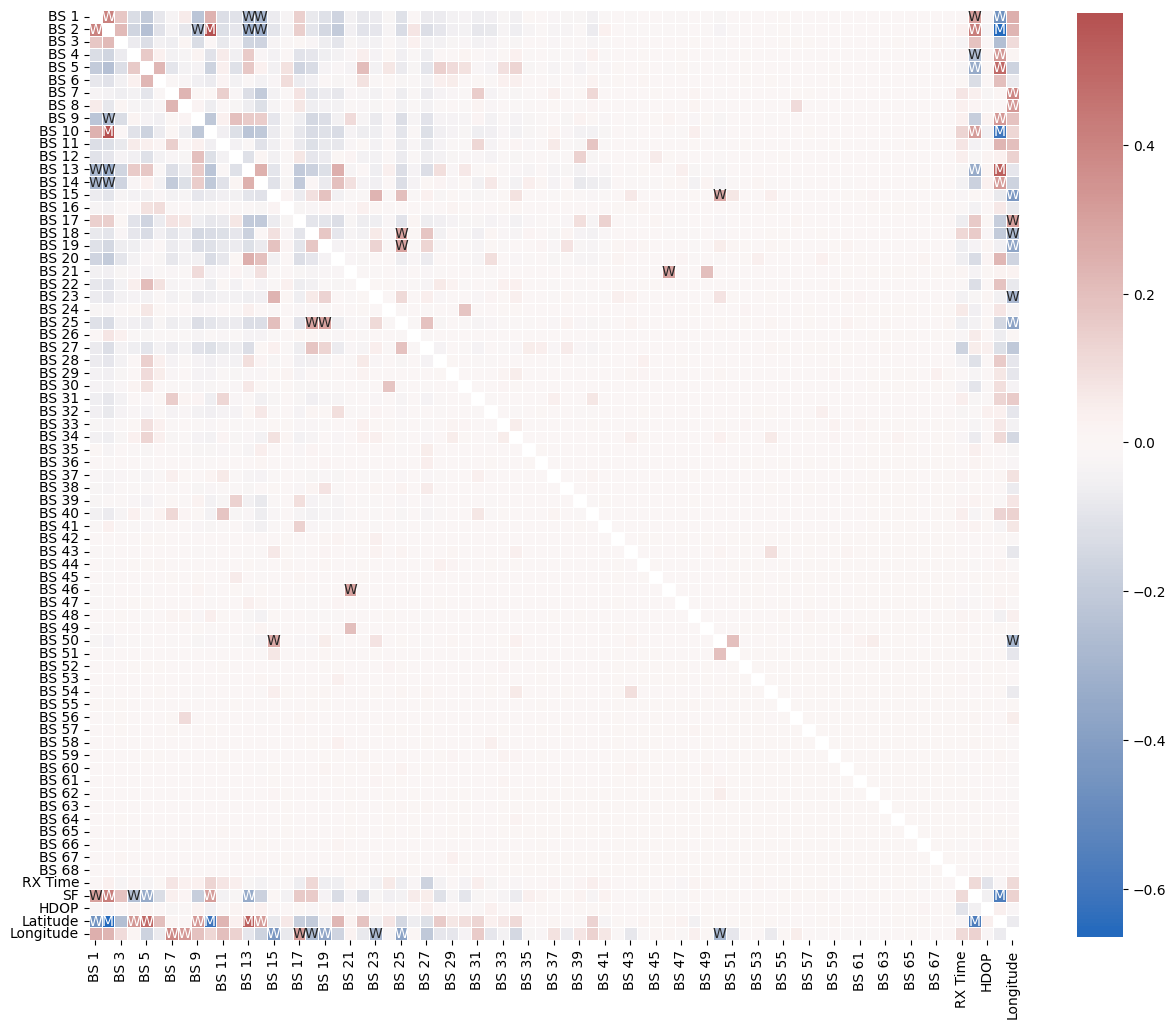

In [26]:
# Computes feature correlation
df_corr = ds_mod.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

# Pearson correlation

Correlation > 0.75 "S"

Correlation > 0.5 "M"

Correlation > 0.25 "W"

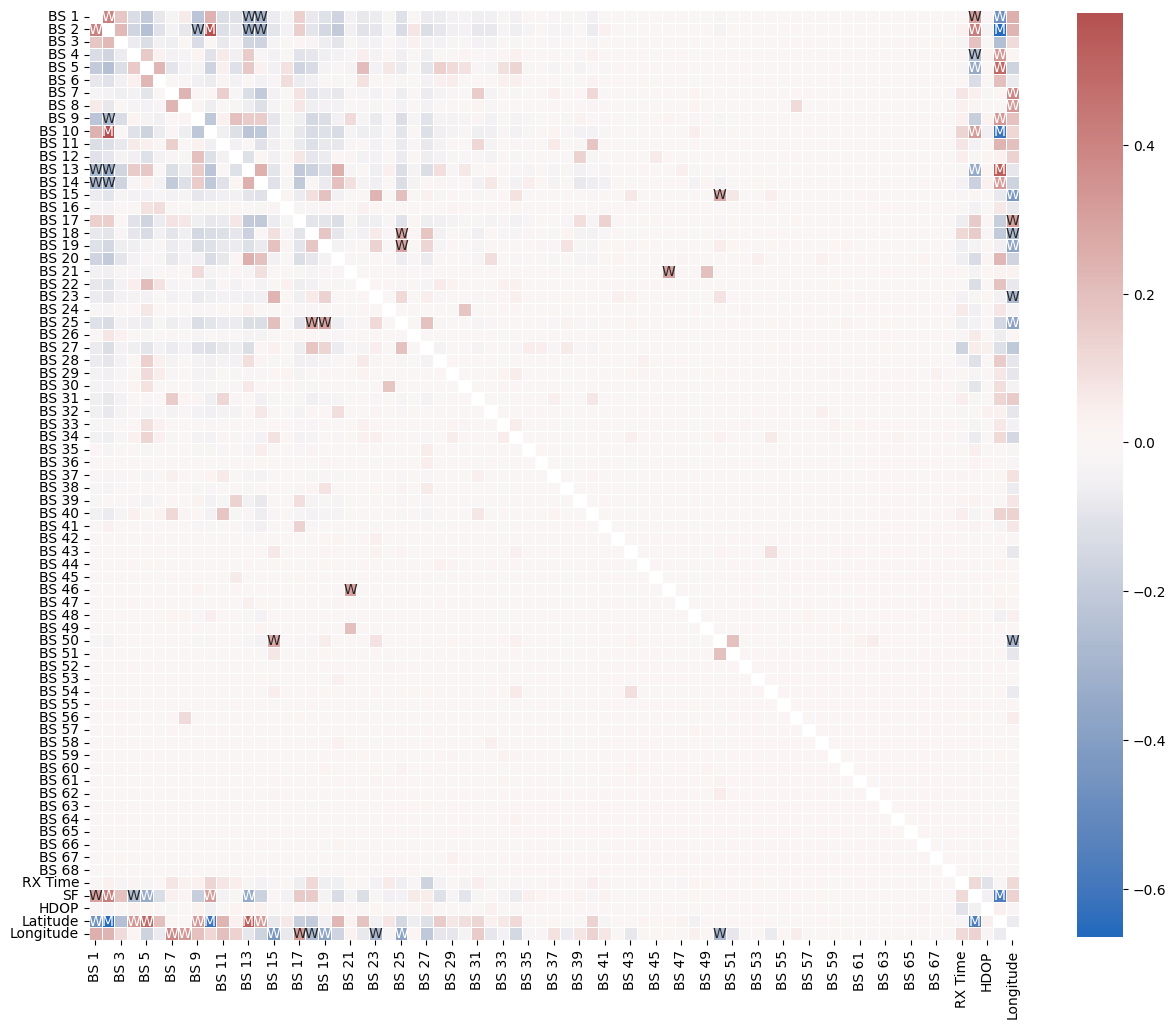

Note: Depending on the dataset and the kind of features (e.g. ordinal or continuous features) you might want to use the spearman method instead of the pearson method to compute the correlation.

Whereas the **Pearson** correlation evaluates the linear relationship between two **continuous variables**, 

the **Spearman** correlation evaluates the monotonic relationship based on the ranked values for each feature. And to help with the interpretation of this correlation matrix, let’s use seaborn’s .heatmap() to visualize it.

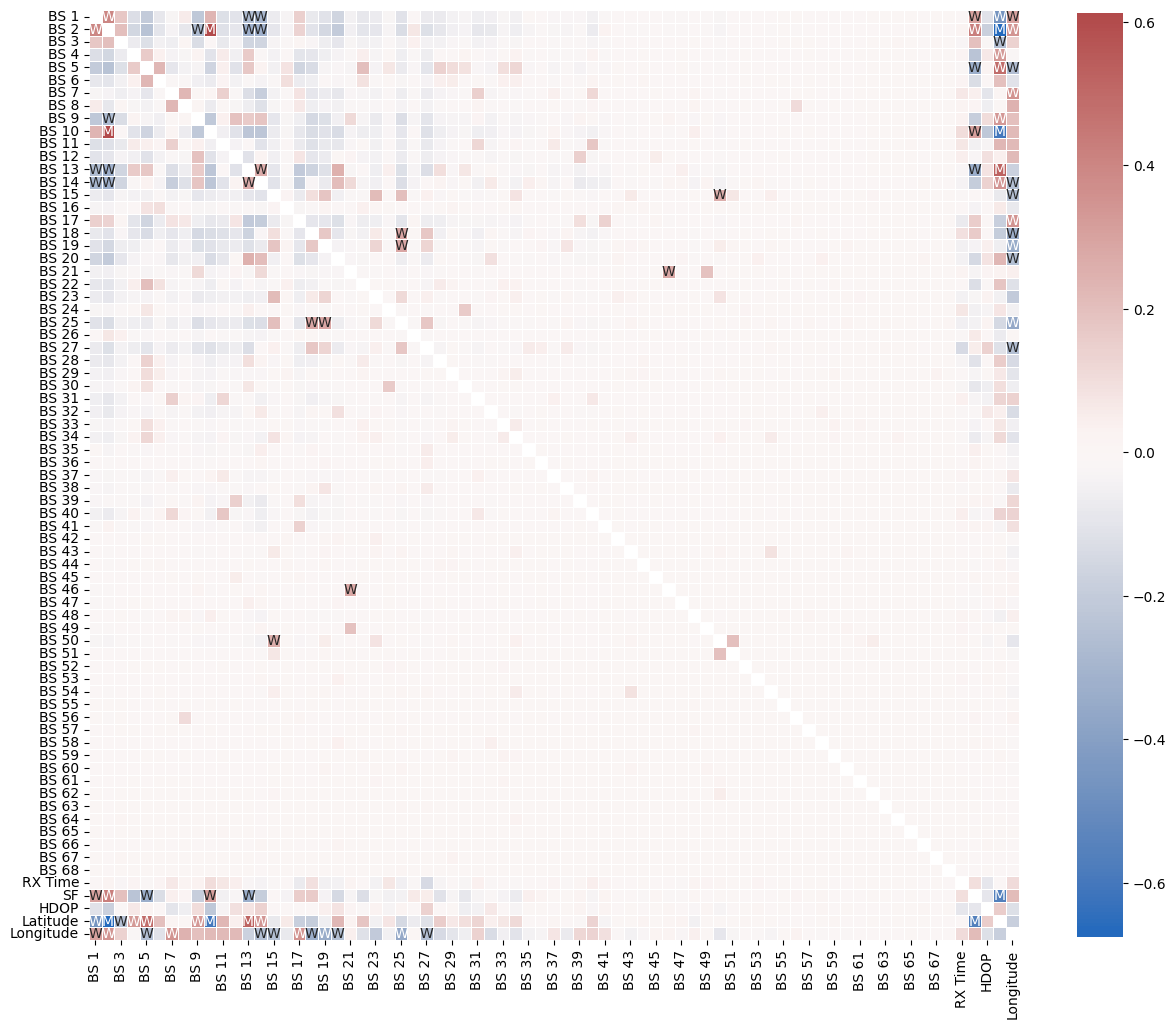

In [27]:
# Computes feature correlation
df_corr = ds_mod.corr(method="spearman")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

# Spearman Correlation 
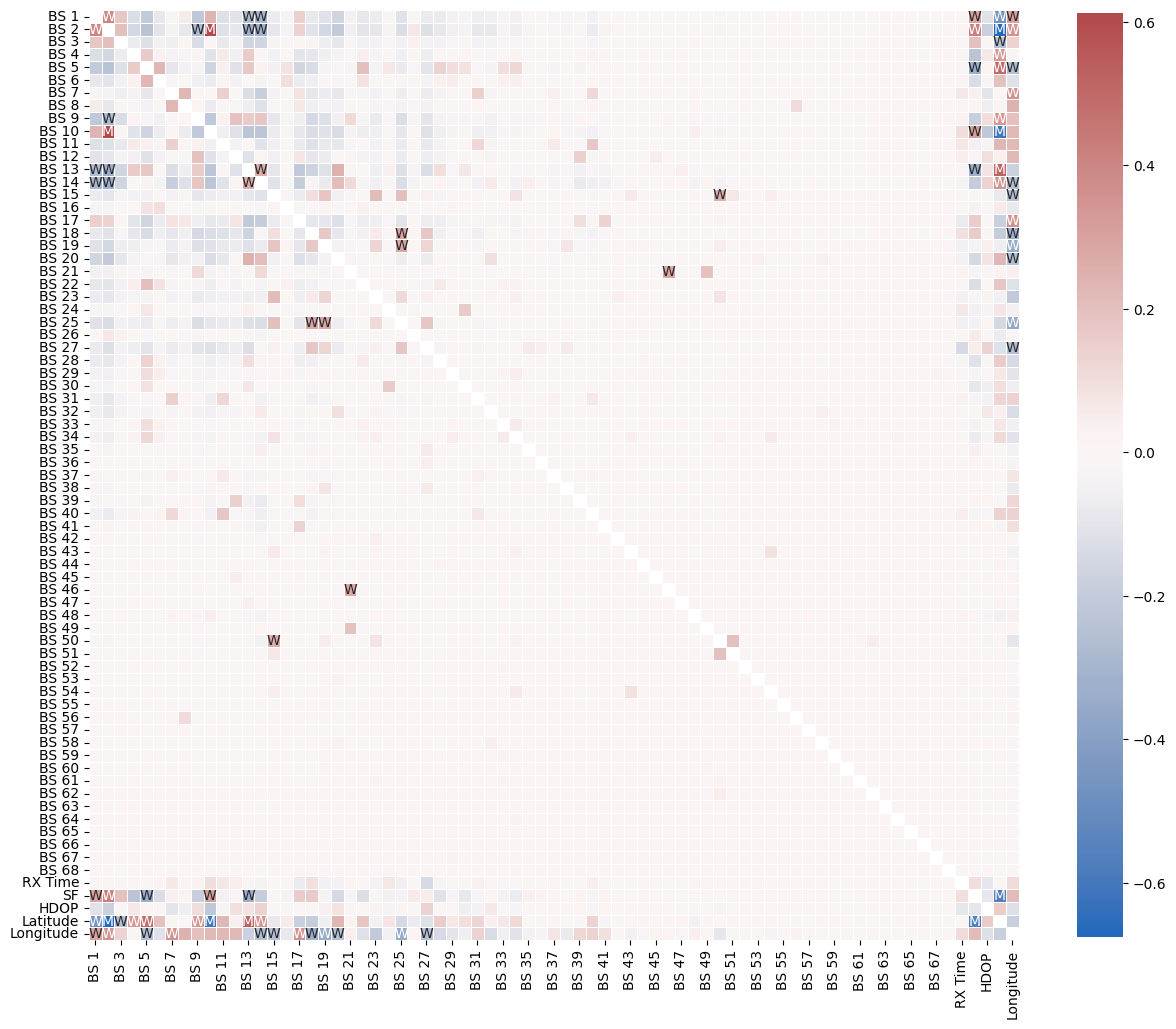

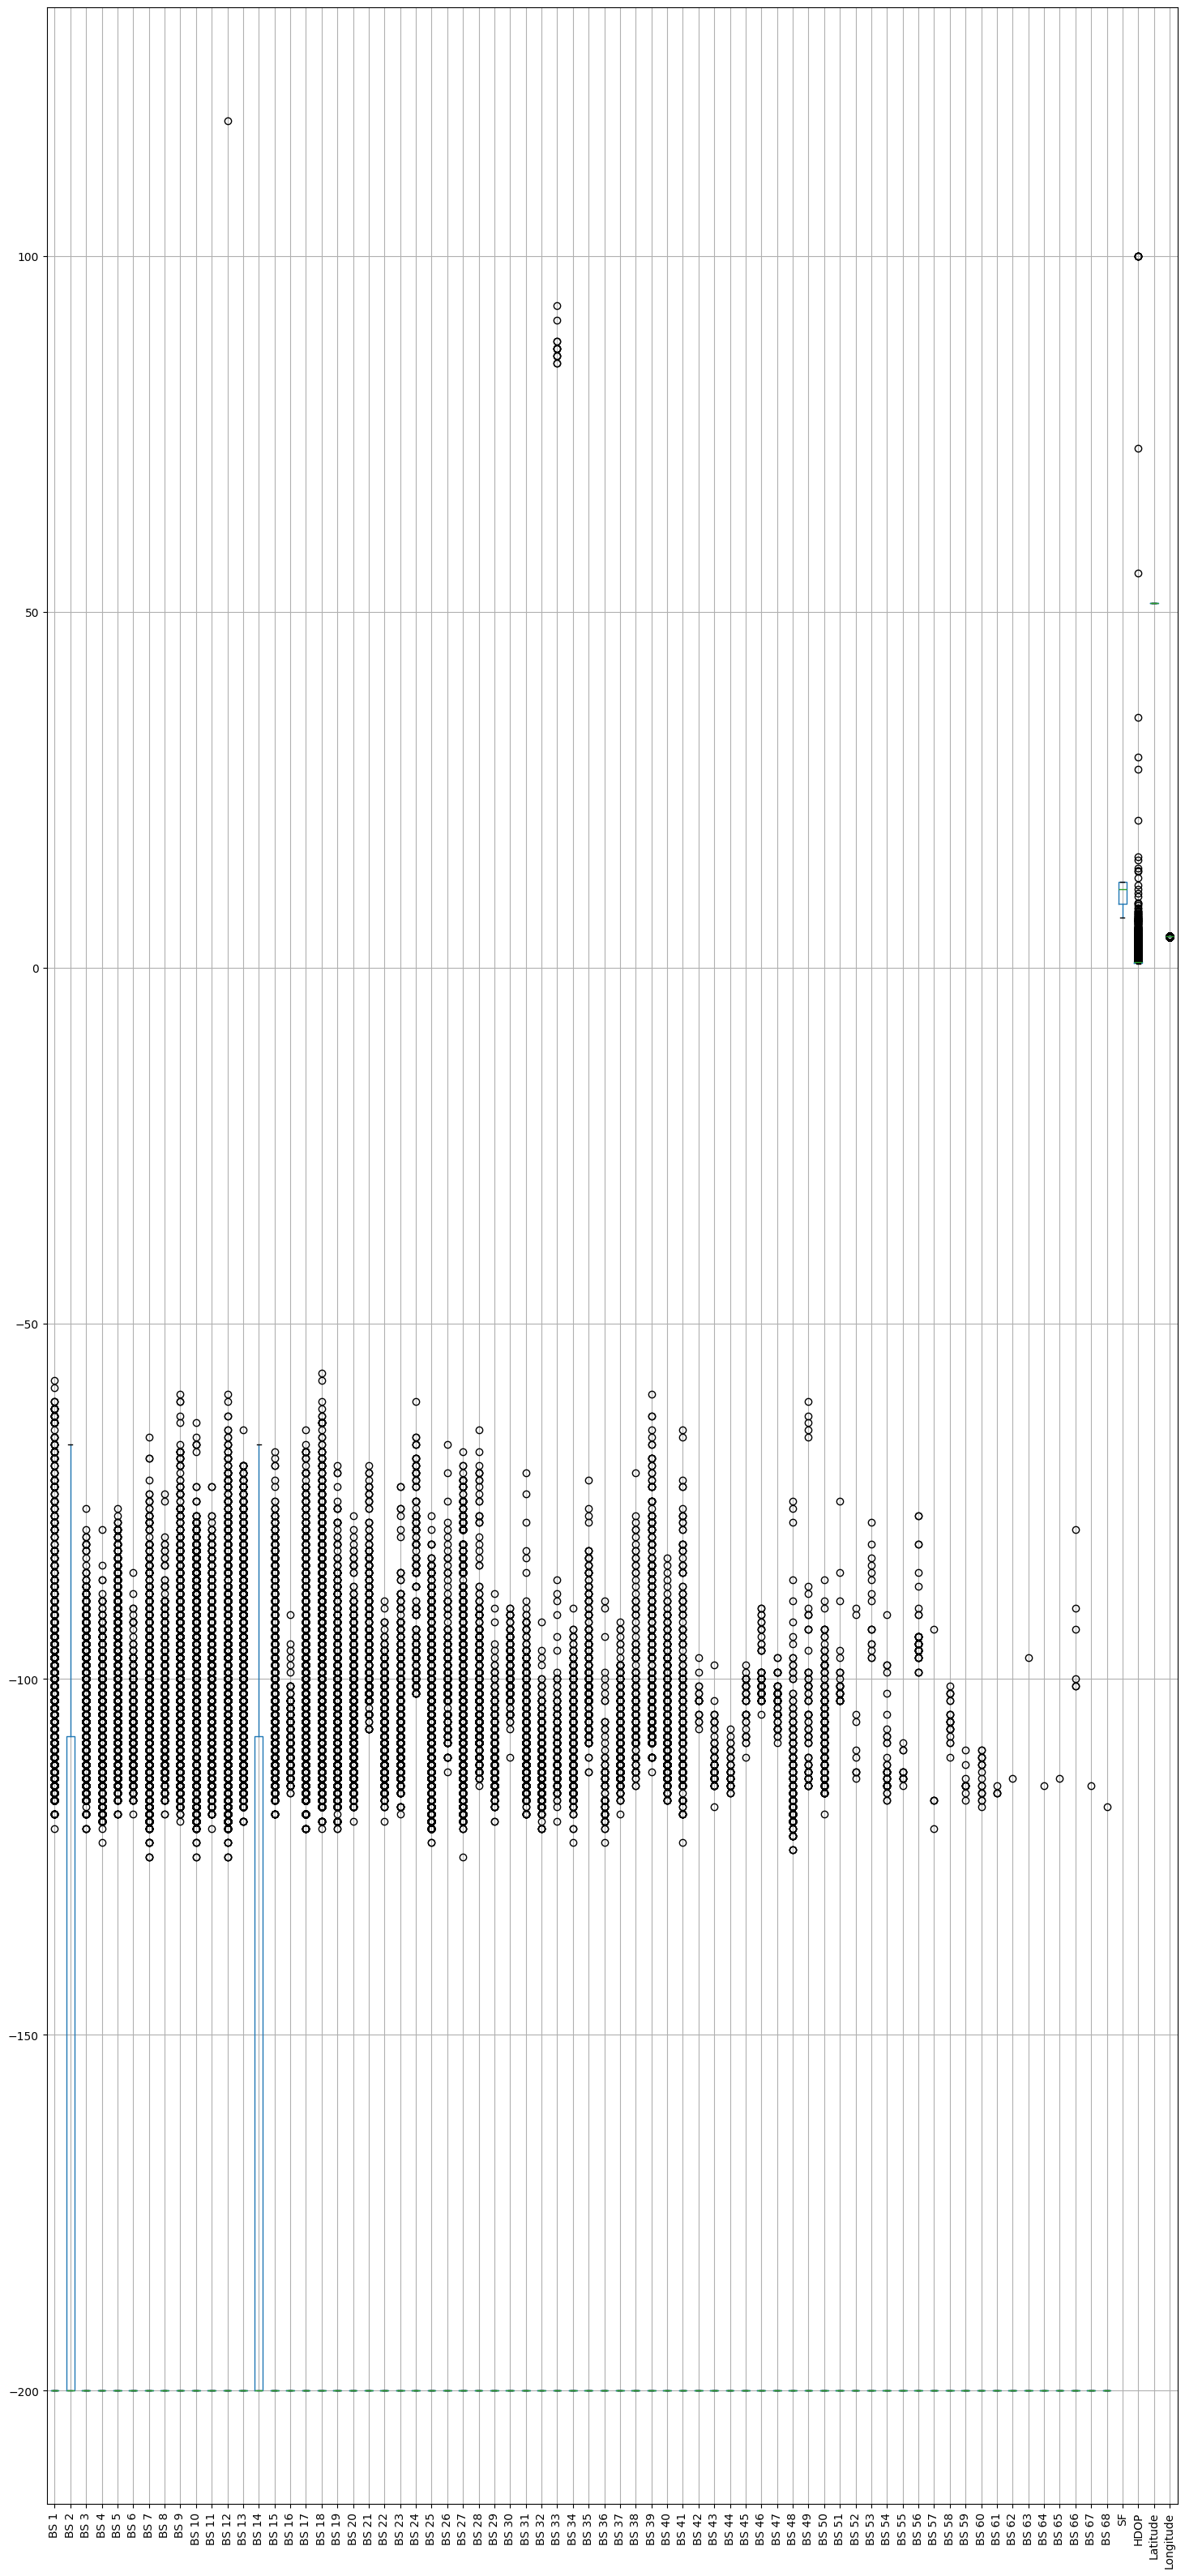

In [28]:
plt.figure(figsize=(18,40))

ds_mod.boxplot()
plt.xticks(rotation=90)
plt.show()

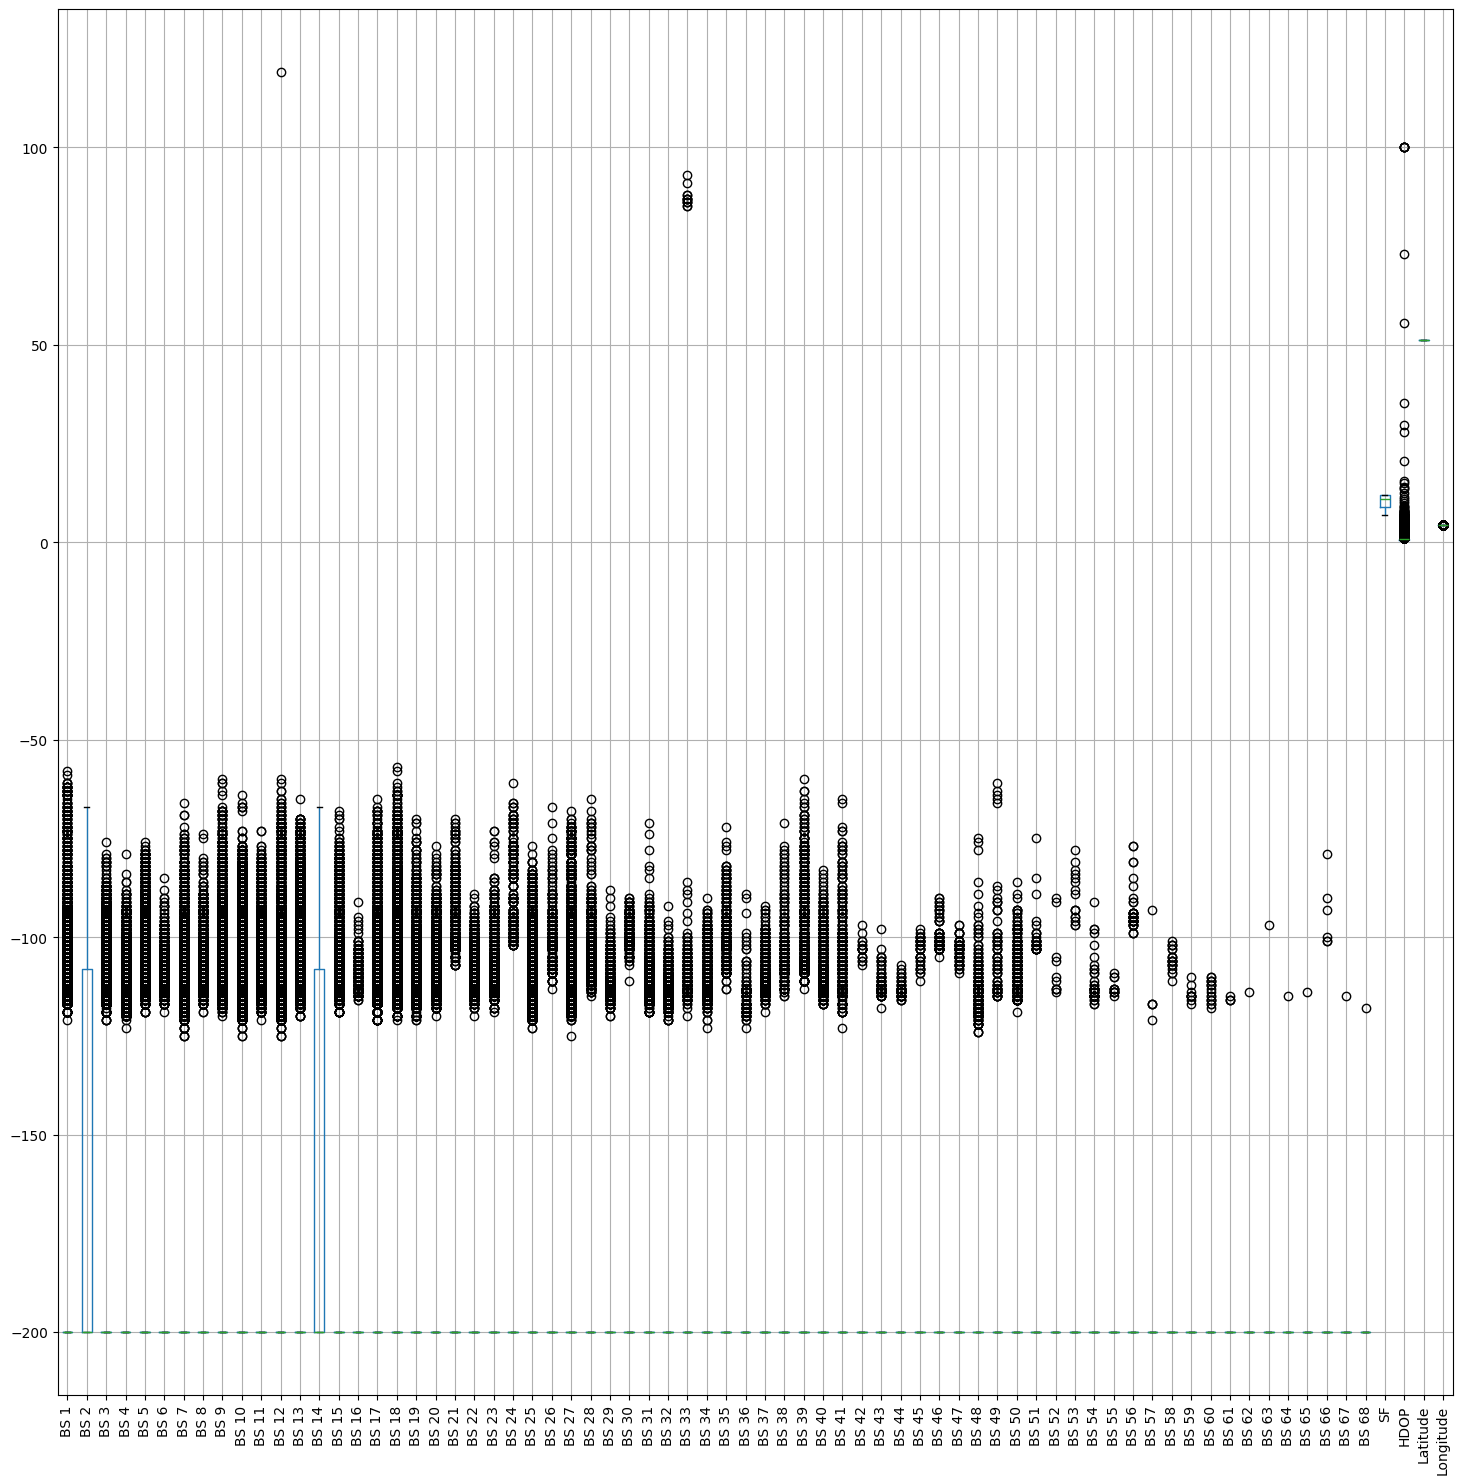

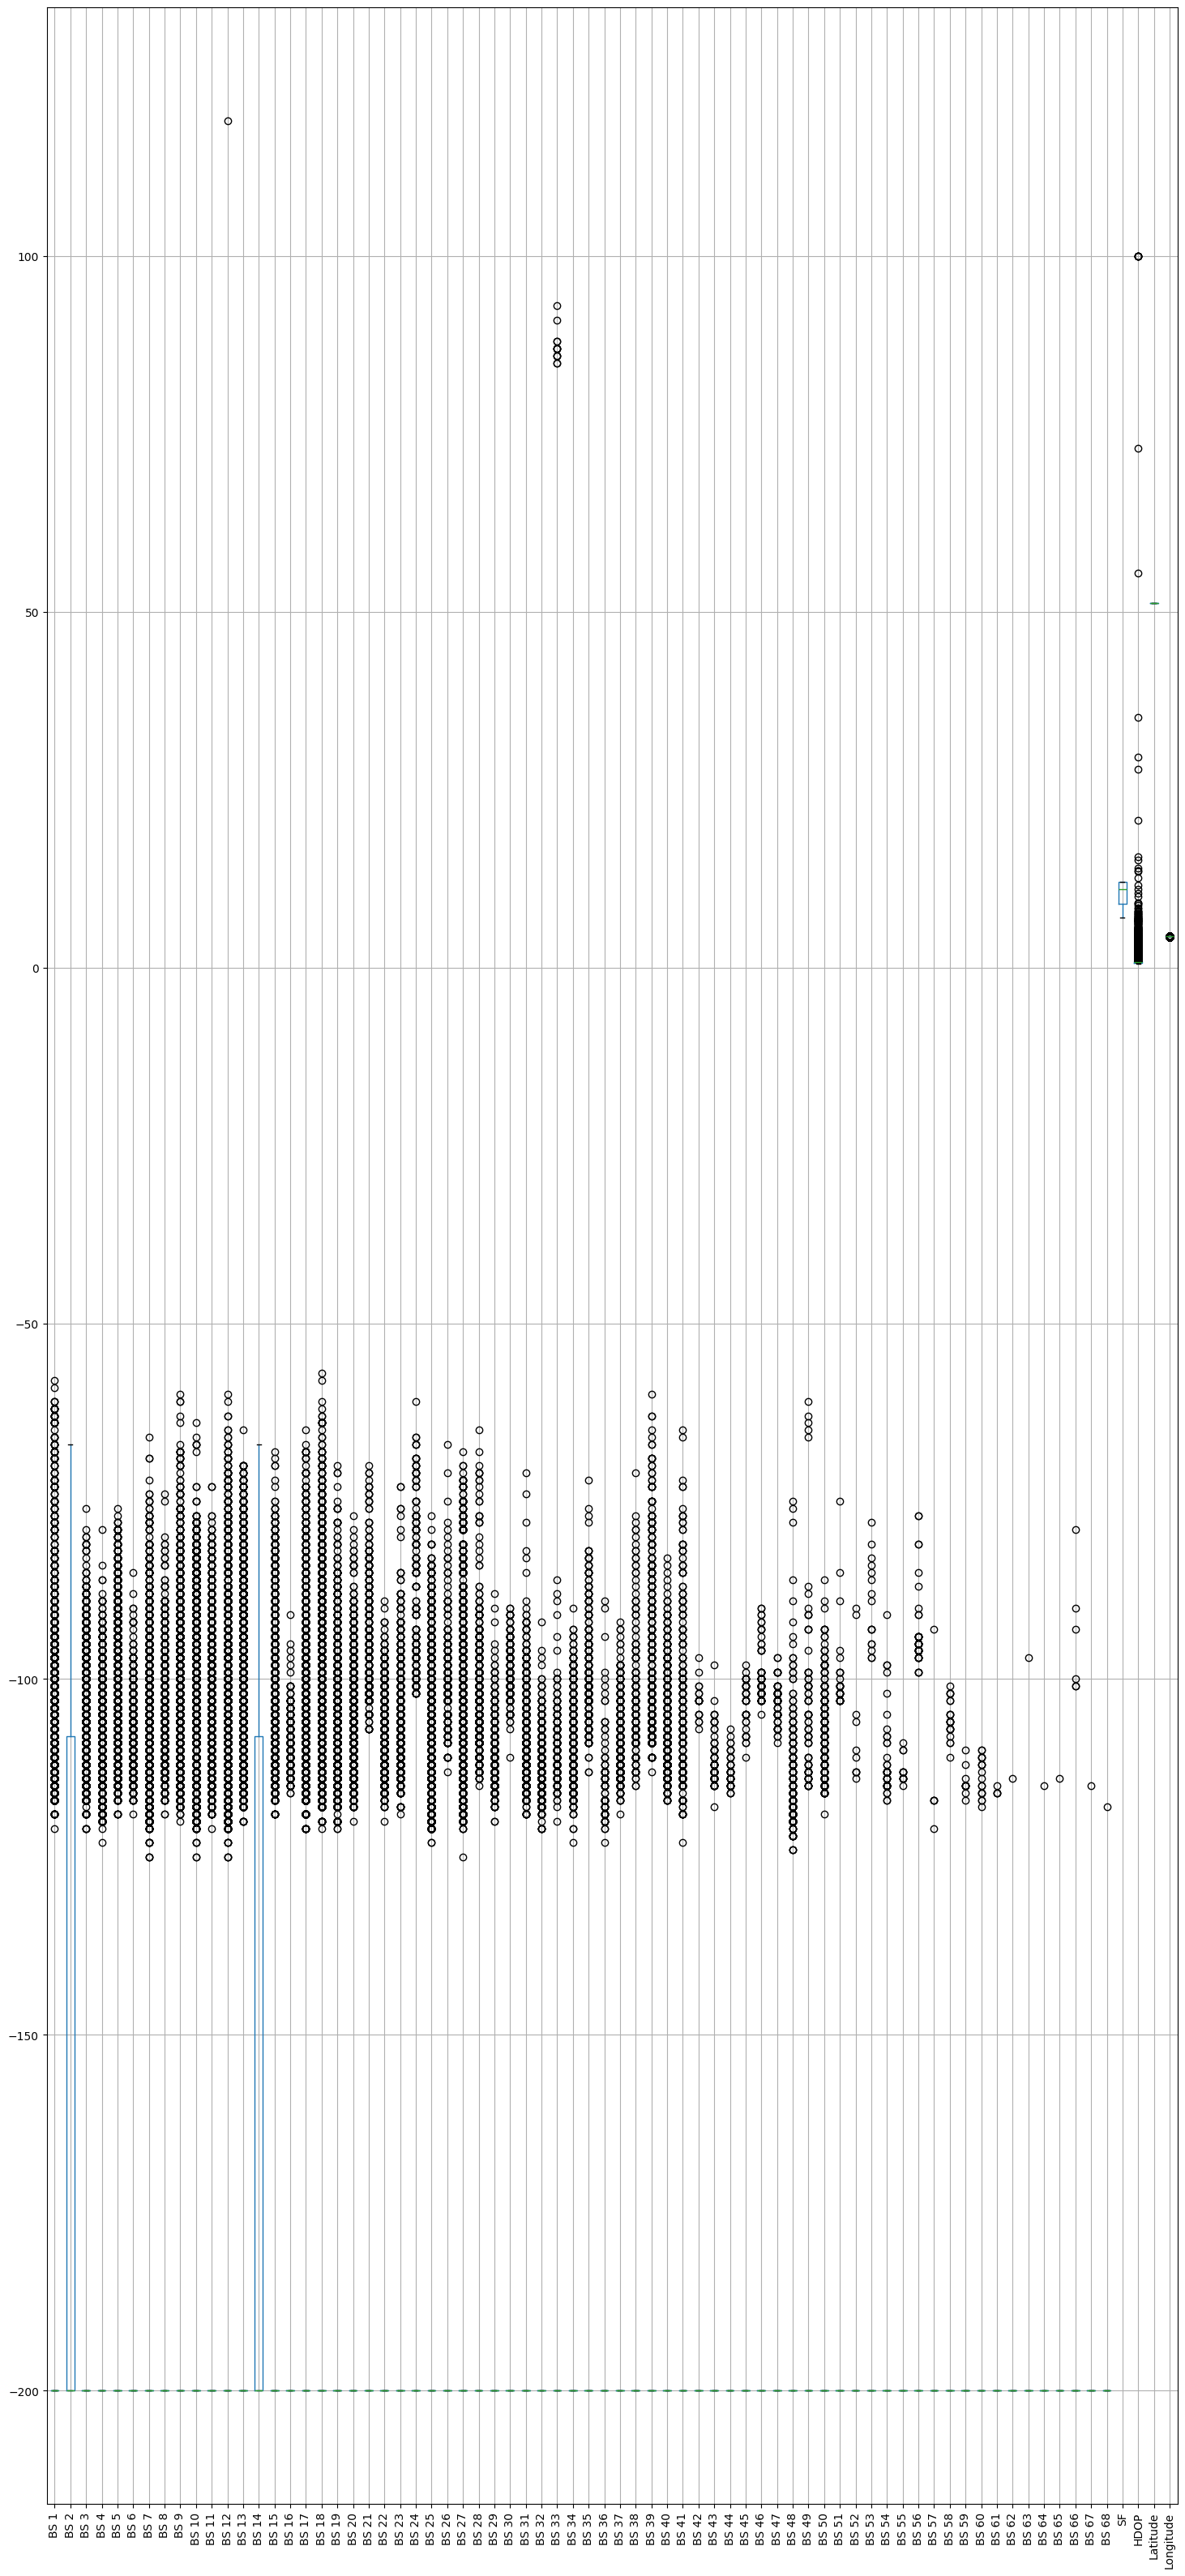

# Repetitive data

In [29]:
num_rows = len(ds_mod)

for col in ds_mod.columns:
    cnts = ds_mod[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.70:
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()

BS 1: 77.31%
BS 1
-200    95503
-114     4328
-113     3125
-112     1998
-115     1974
        ...  
-61         3
-58         1
-59         1
-121        1
-65         1
Name: count, Length: 62, dtype: int64

BS 2: 70.25%
BS 2
-200    86779
-100     2933
-99      2791
-101     2517
-102     2222
-98      2204
-103     2164
-104     2144
-105     1992
-106     1737
-97      1673
-107     1472
-96      1316
-95      1251
-94      1236
-108     1218
-109     1089
-93      1071
-110      913
-111      828
-112      716
-113      561
-92       558
-115      432
-114      322
-116      256
-117      192
-91       178
-118      137
-119      103
-90        77
-85        74
-89        60
-86        57
-87        55
-88        40
-84        30
-80        23
-81        19
-83        17
-82        14
-79        12
-121       11
-78         9
-123        5
-76         5
-75         4
-68         3
-77         3
-125        2
-67         2
-71         1
Name: count, dtype: int64

BS 3: 90.74%
BS 

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def stripplot(y):
    # Establish the number of columns and rows needed to plot all features
    n_cols = 5

    # Specify the y_values to spread data (ideally continuous features)
    columns = ['BS 1', 'BS 2', 'BS 3', 'BS 4', 'BS 5', 'BS 6', 'BS 7', 'BS 8', 'BS 9',
            'BS 10', 'BS 11', 'BS 12', 'BS 13', 'BS 14', 'BS 15', 'BS 16', 'BS 17',
            'BS 18', 'BS 19', 'BS 20', 'BS 21', 'BS 22', 'BS 23', 'BS 24', 'BS 25',
            'BS 26', 'BS 27']

    n_elements = len(columns)
    n_rows = np.ceil(n_elements / n_cols).astype("int")

    # Create a figure object with as many rows and columns as needed
    fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(30, n_rows * 5))

    # Loop through features and put each subplot on a matplotlib axis object
    print('plotting......')
    for col, ax in zip(columns, axes.ravel()):
        sns.stripplot(data=ds_mod, x=col, y=ds_mod[y], ax=ax, palette="tab10", size=1, alpha=0.5)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels
    plt.tight_layout()
    print('saving figure......')
    plt.savefig(f'antwerp_ds_stripplot_{y}.png')


plotting......


C:\Users\Sudip Barua\AppData\Local\Temp\ipykernel_3232\133821874.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=ds_mod, x=col, y=ds_mod[y], ax=ax, palette="tab10", size=1, alpha=0.5)
C:\Users\Sudip Barua\AppData\Local\Temp\ipykernel_3232\133821874.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels
C:\Users\Sudip Barua\AppData\Local\Temp\ipykernel_3232\133821874.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=ds_mod, x=col, y=ds_mod[y], ax=ax, palette="tab10", size=1, alpha=0.5)
C:\Users\Sudip Barua\AppDa

saving figure......
plotting......


C:\Users\Sudip Barua\AppData\Local\Temp\ipykernel_3232\133821874.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=ds_mod, x=col, y=ds_mod[y], ax=ax, palette="tab10", size=1, alpha=0.5)
C:\Users\Sudip Barua\AppData\Local\Temp\ipykernel_3232\133821874.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels
C:\Users\Sudip Barua\AppData\Local\Temp\ipykernel_3232\133821874.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=ds_mod, x=col, y=ds_mod[y], ax=ax, palette="tab10", size=1, alpha=0.5)
C:\Users\Sudip Barua\AppDa

saving figure......
plotting......


C:\Users\Sudip Barua\AppData\Local\Temp\ipykernel_3232\133821874.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=ds_mod, x=col, y=ds_mod[y], ax=ax, palette="tab10", size=1, alpha=0.5)
C:\Users\Sudip Barua\AppData\Local\Temp\ipykernel_3232\133821874.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels
C:\Users\Sudip Barua\AppData\Local\Temp\ipykernel_3232\133821874.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=ds_mod, x=col, y=ds_mod[y], ax=ax, palette="tab10", size=1, alpha=0.5)
C:\Users\Sudip Barua\AppDa

saving figure......
plotting......


C:\Users\Sudip Barua\AppData\Local\Temp\ipykernel_3232\133821874.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=ds_mod, x=col, y=ds_mod[y], ax=ax, palette="tab10", size=1, alpha=0.5)
C:\Users\Sudip Barua\AppData\Local\Temp\ipykernel_3232\133821874.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels
C:\Users\Sudip Barua\AppData\Local\Temp\ipykernel_3232\133821874.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=ds_mod, x=col, y=ds_mod[y], ax=ax, palette="tab10", size=1, alpha=0.5)
C:\Users\Sudip Barua\AppDa

saving figure......


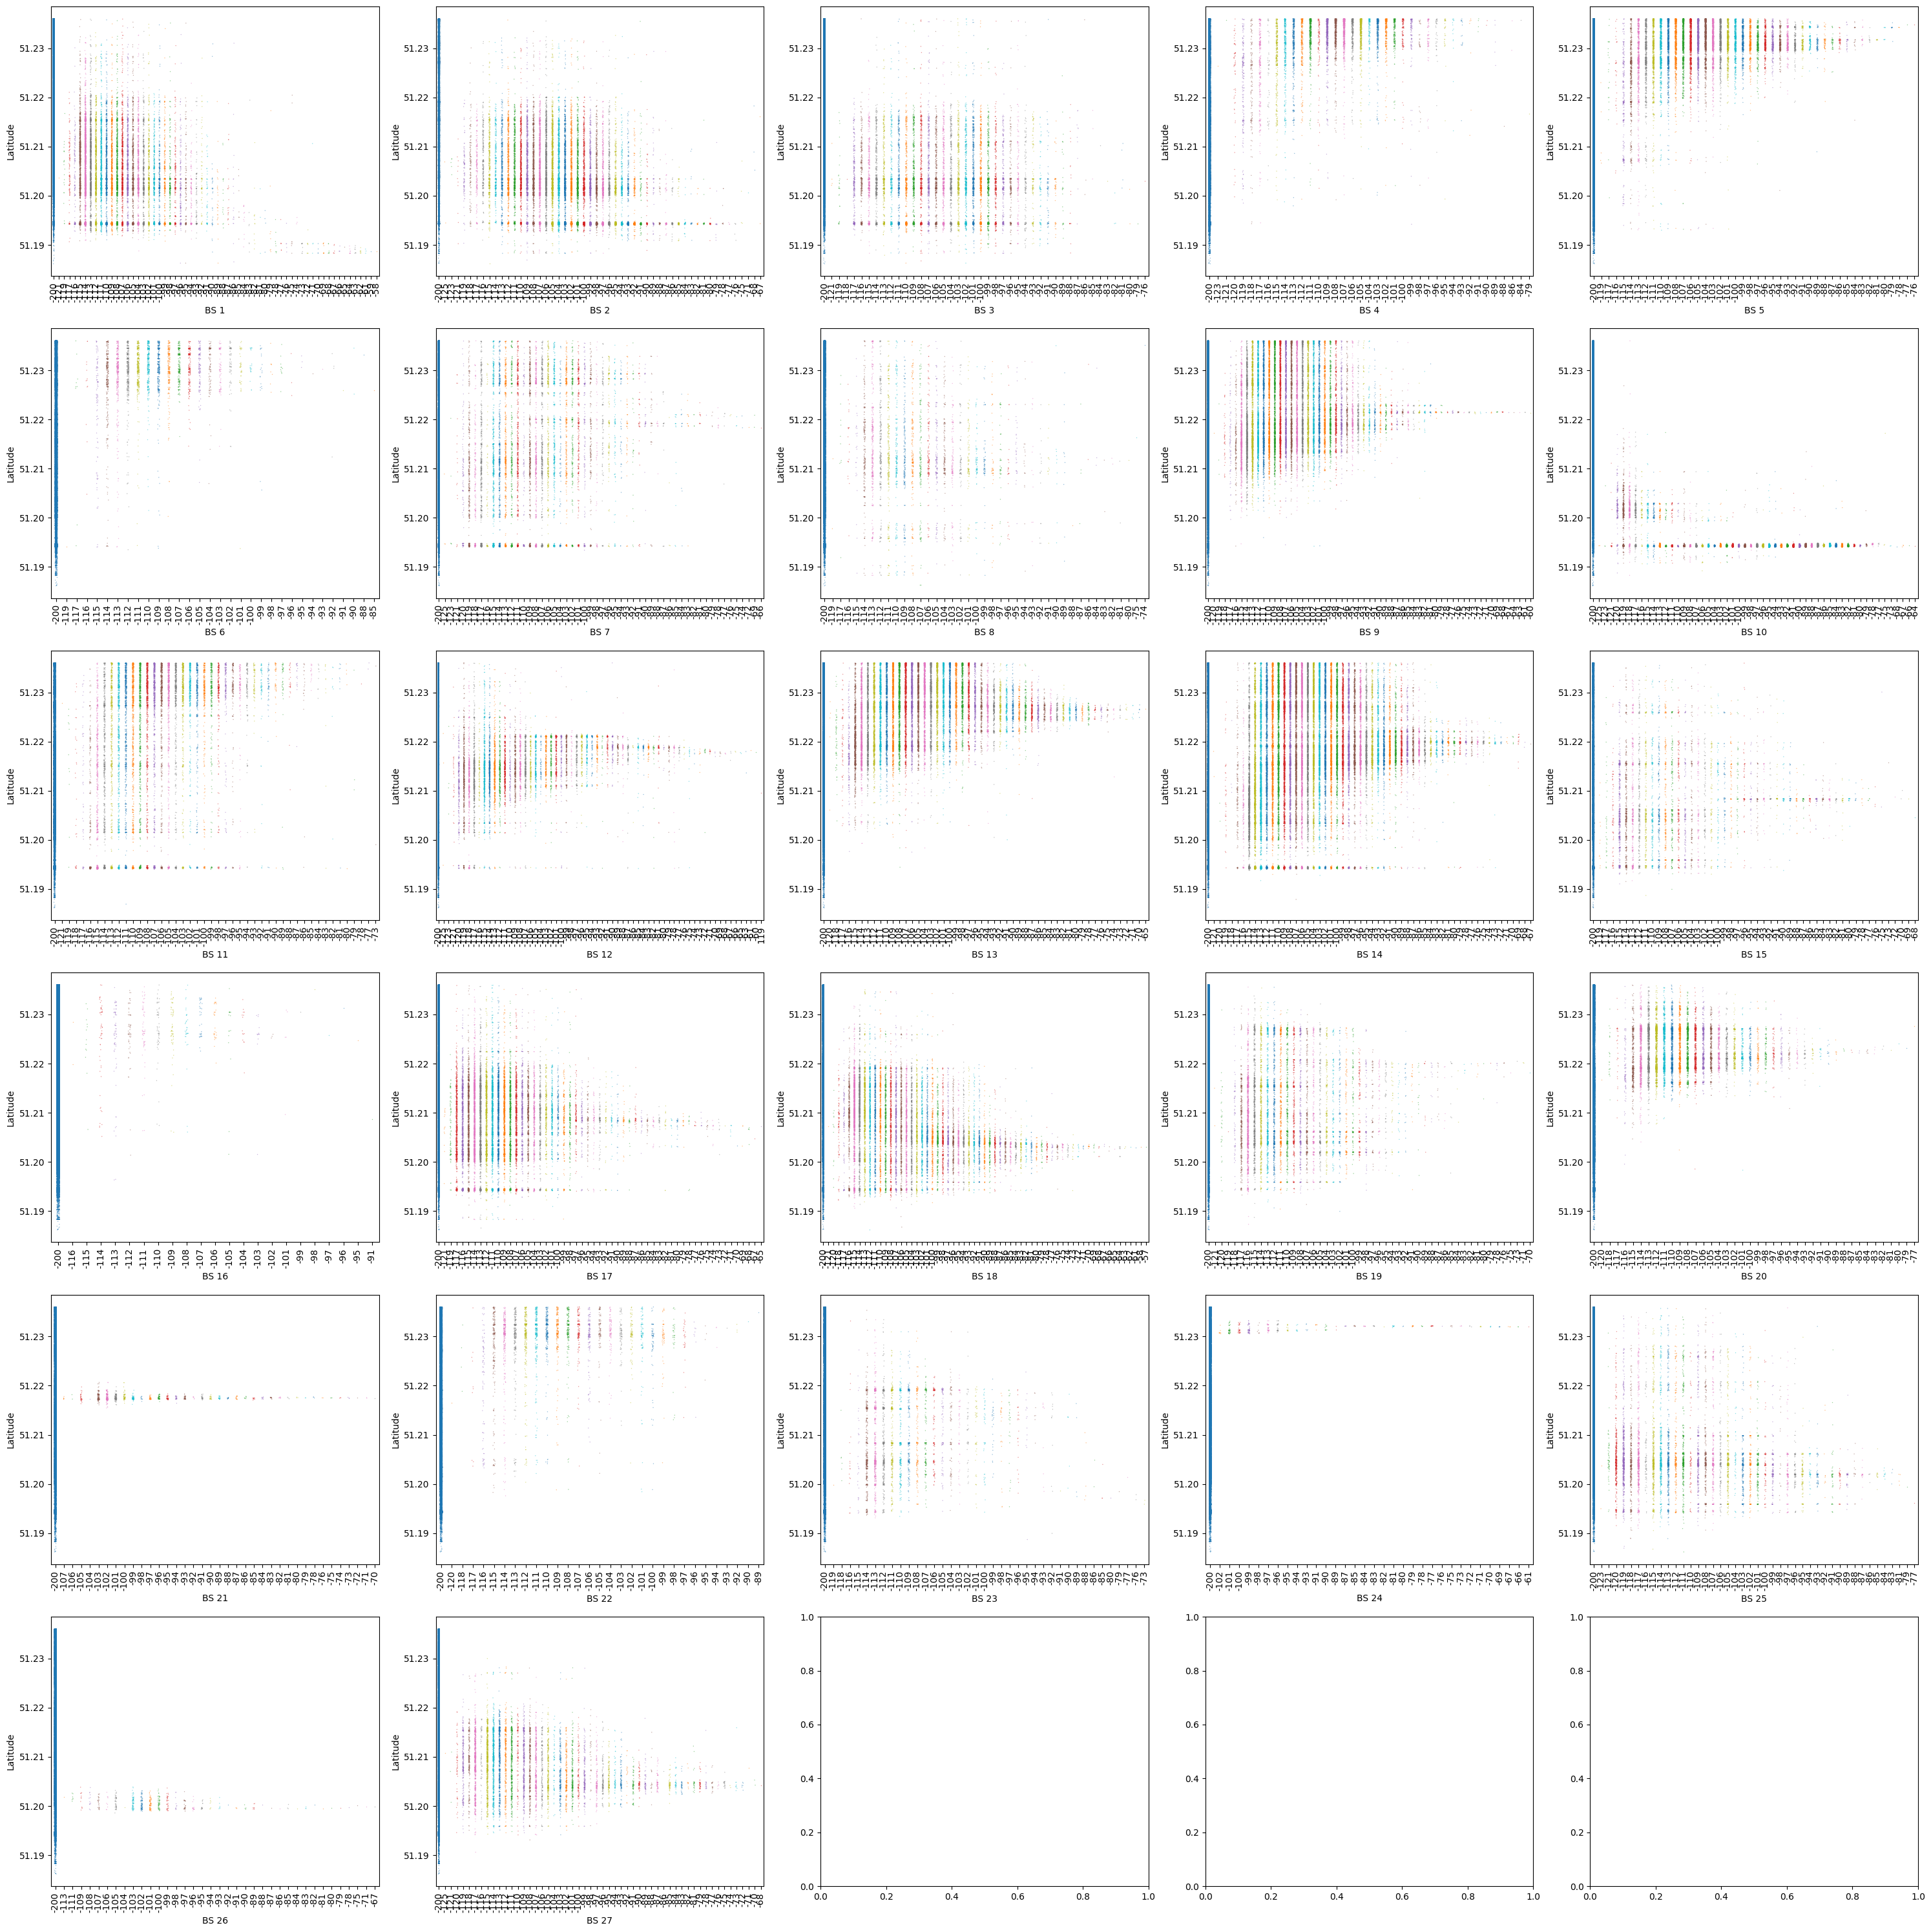

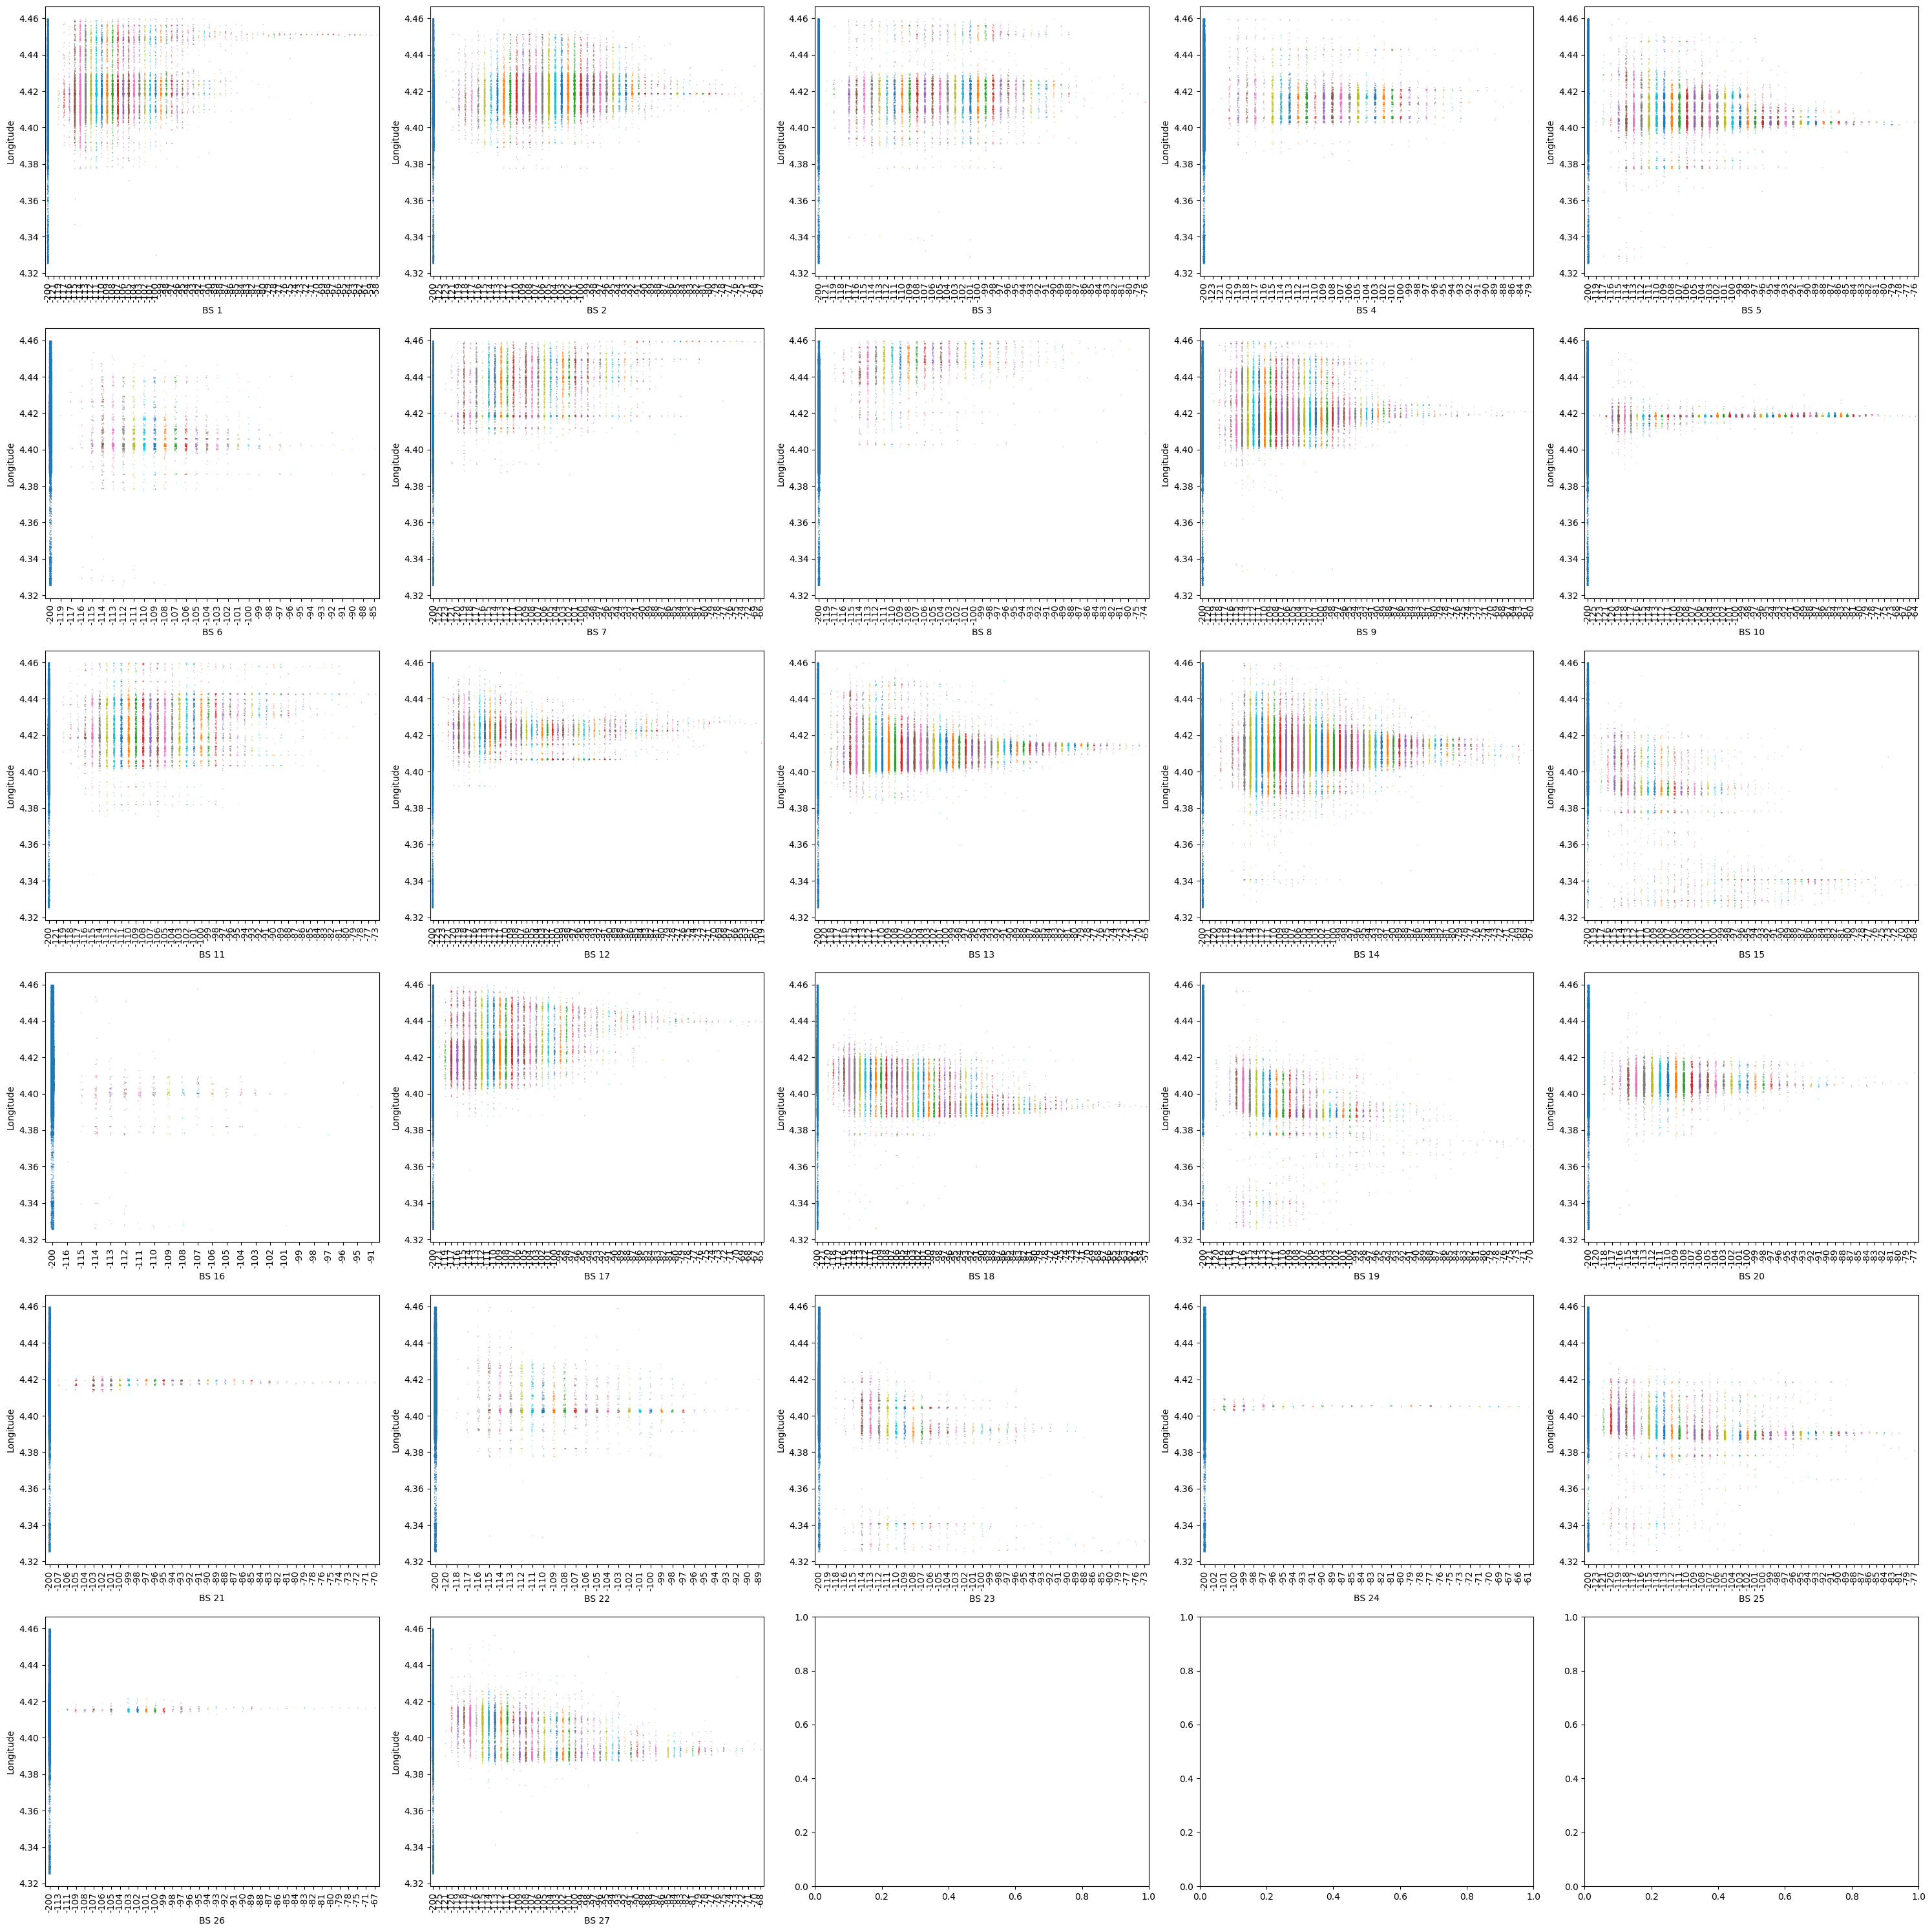

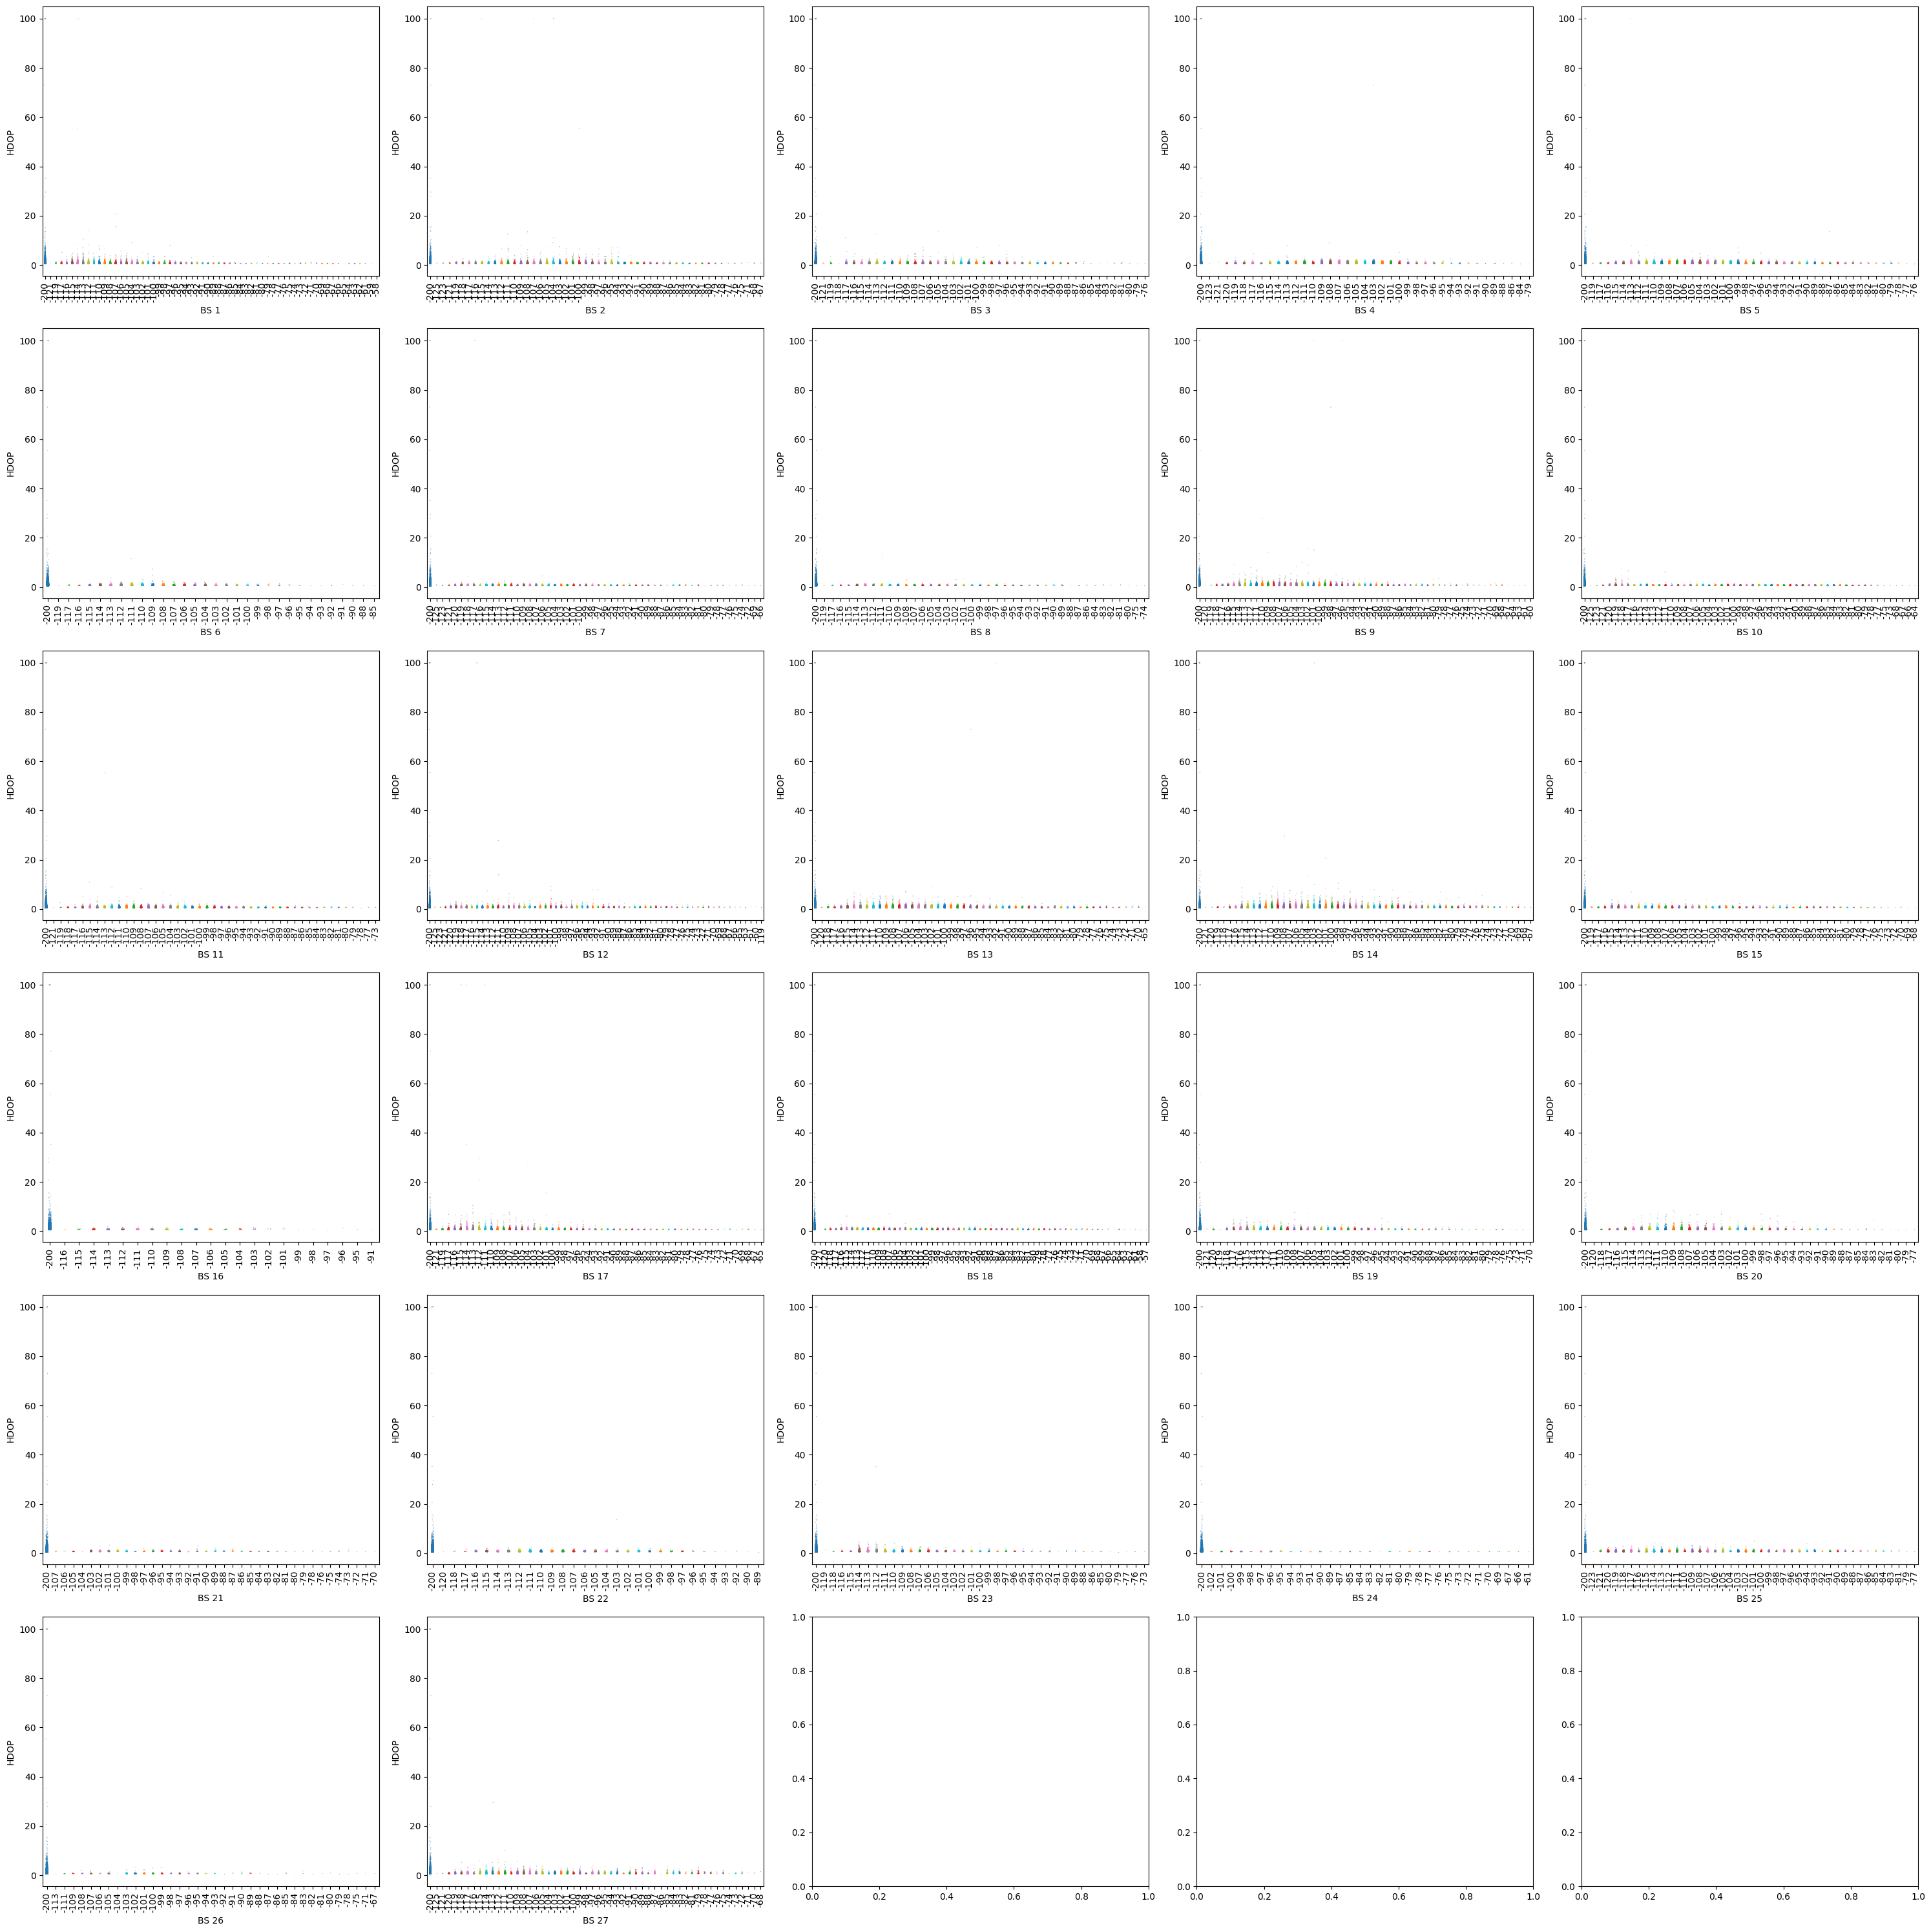

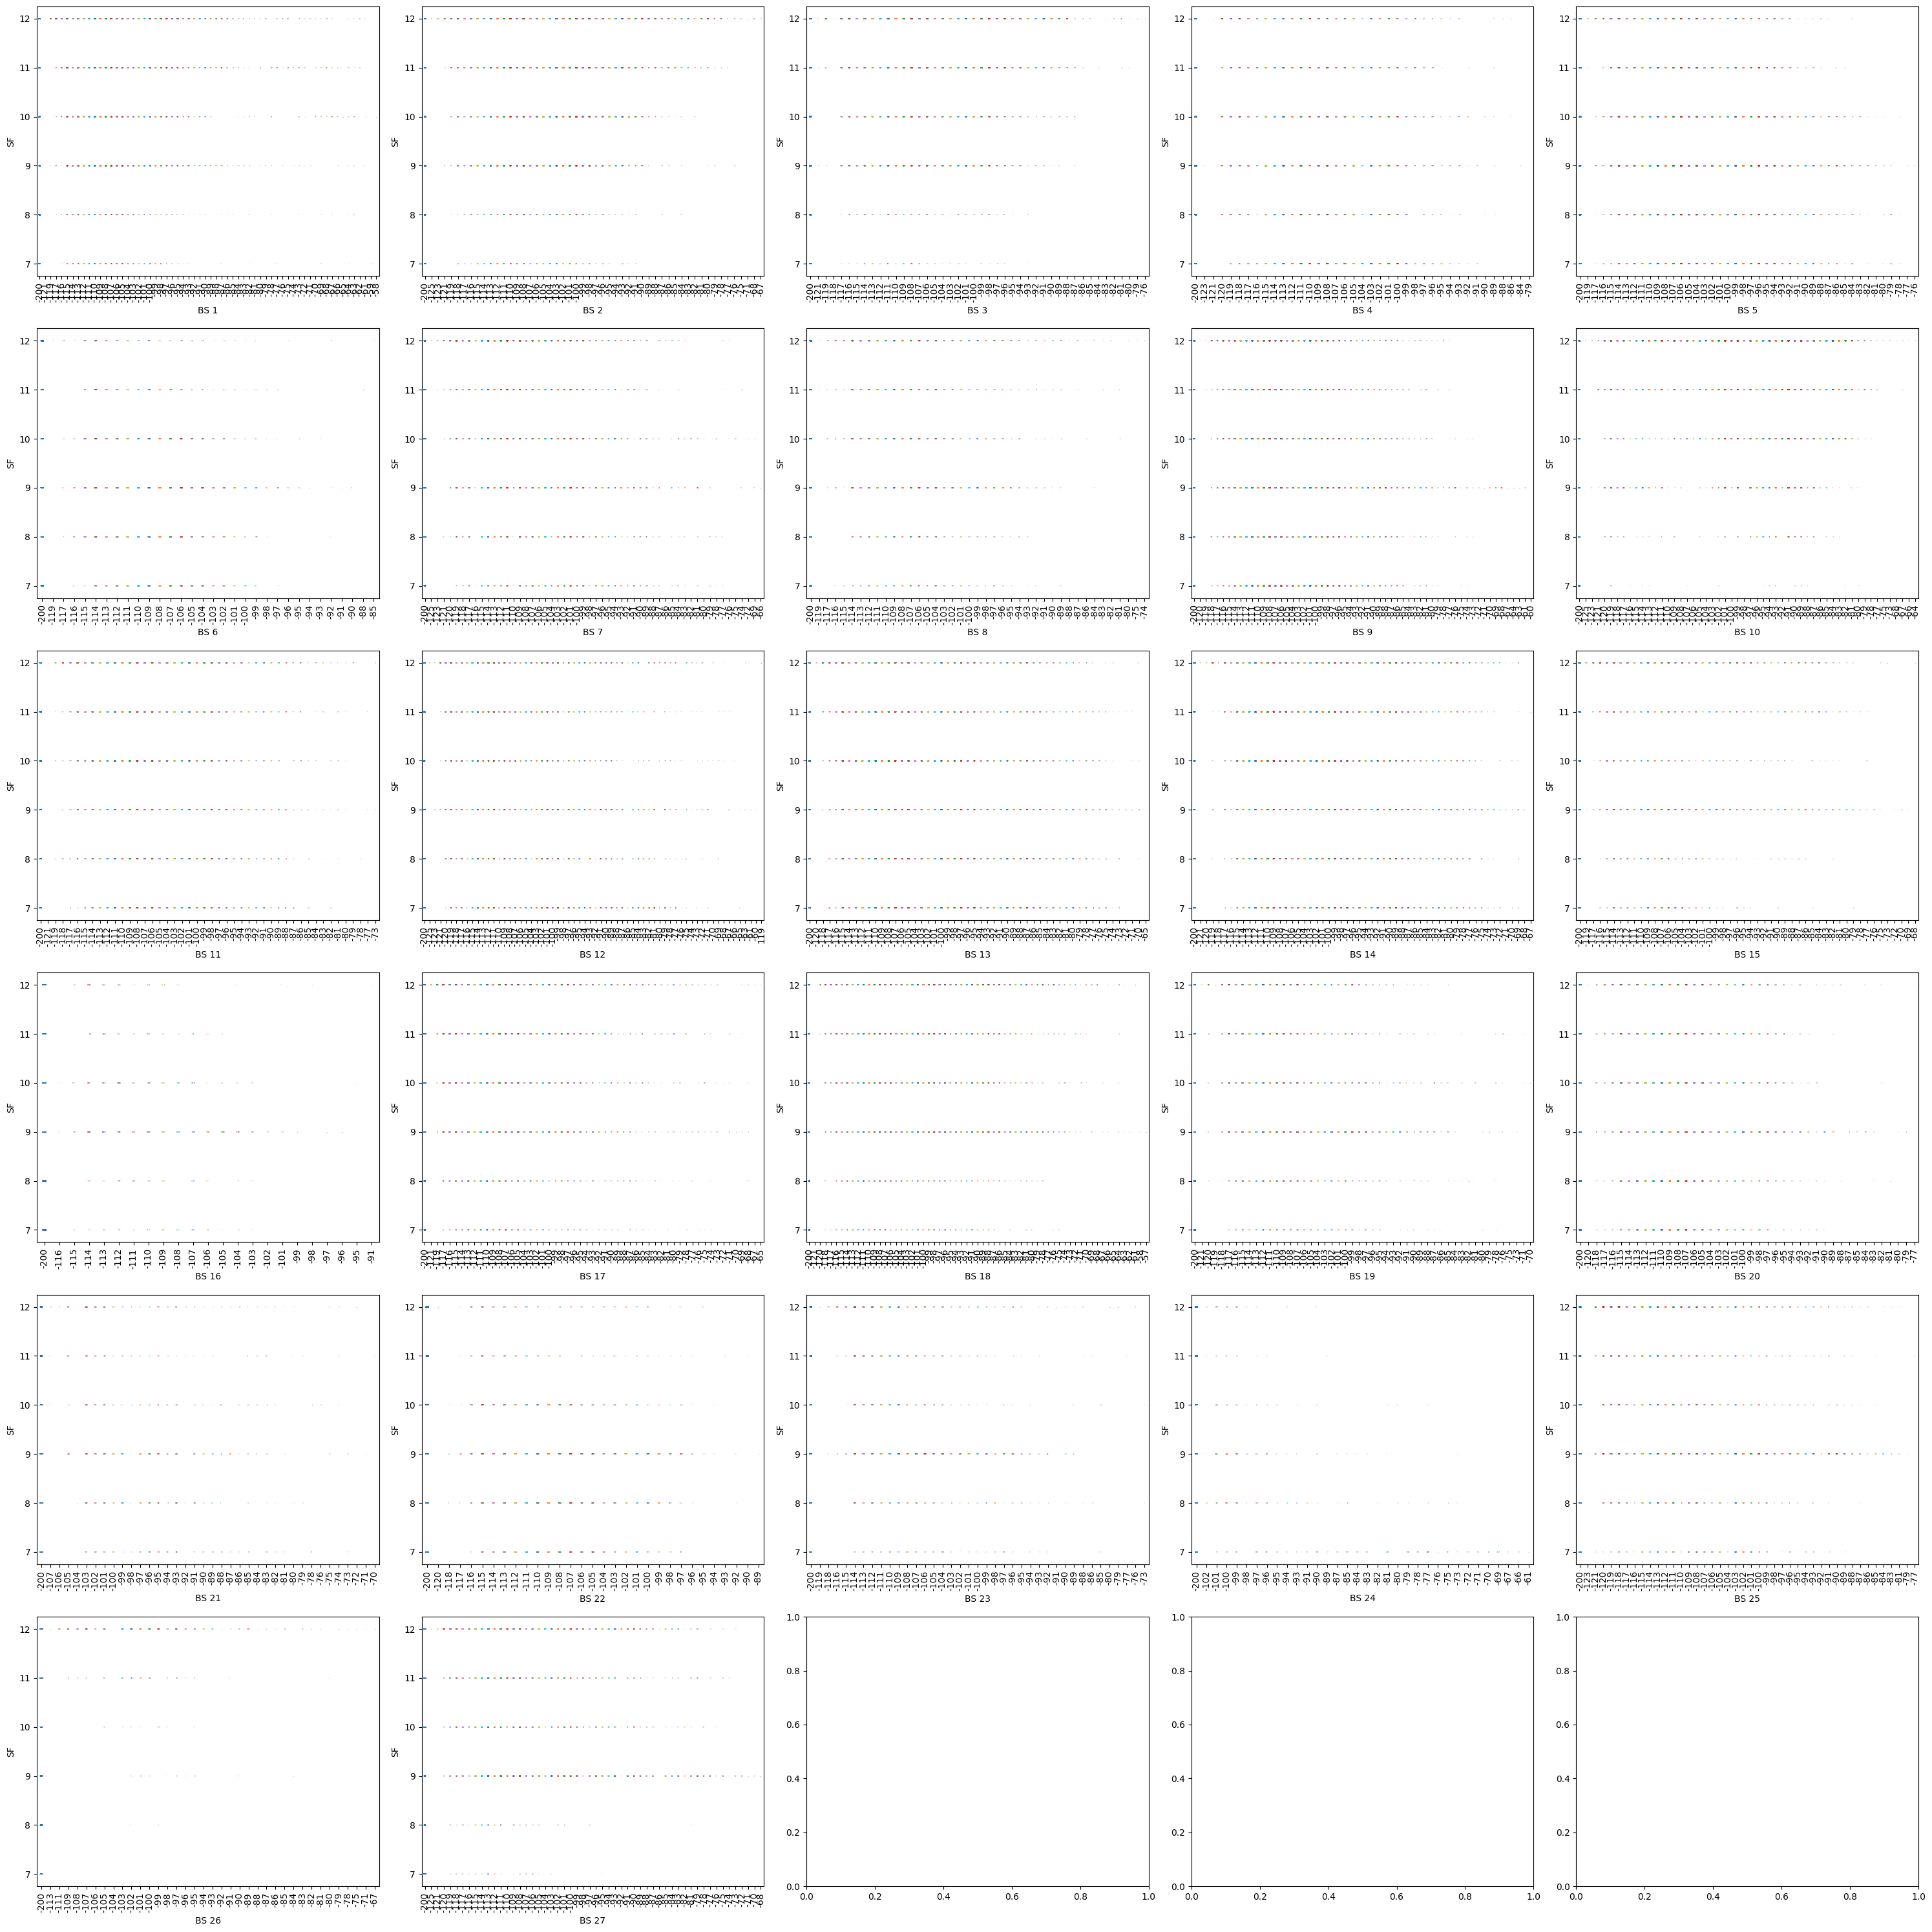

In [39]:
stripplot('Latitude')
stripplot('Longitude')
stripplot('HDOP')
stripplot('SF')

In [31]:
ds_mod.columns

Index(['BS 1', 'BS 2', 'BS 3', 'BS 4', 'BS 5', 'BS 6', 'BS 7', 'BS 8', 'BS 9',
       'BS 10', 'BS 11', 'BS 12', 'BS 13', 'BS 14', 'BS 15', 'BS 16', 'BS 17',
       'BS 18', 'BS 19', 'BS 20', 'BS 21', 'BS 22', 'BS 23', 'BS 24', 'BS 25',
       'BS 26', 'BS 27', 'BS 28', 'BS 29', 'BS 30', 'BS 31', 'BS 32', 'BS 33',
       'BS 34', 'BS 35', 'BS 36', 'BS 37', 'BS 38', 'BS 39', 'BS 40', 'BS 41',
       'BS 42', 'BS 43', 'BS 44', 'BS 45', 'BS 46', 'BS 47', 'BS 48', 'BS 49',
       'BS 50', 'BS 51', 'BS 52', 'BS 53', 'BS 54', 'BS 55', 'BS 56', 'BS 57',
       'BS 58', 'BS 59', 'BS 60', 'BS 61', 'BS 62', 'BS 63', 'BS 64', 'BS 65',
       'BS 66', 'BS 67', 'BS 68', 'RX Time', 'SF', 'HDOP', 'Latitude',
       'Longitude'],
      dtype='object')